In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Chapter 4: Finite Difference Methods for the Heat Equation

While the previous chapter focused on analytical approaches based on Fourier series for solving the heat equation, these methods can not be applied in many other settings. 
For example, we either cannot apply, or it is far more complex to apply these analytical approaches for

- nonlinear problems

- problems with variable coefficients

Even if we were able to apply the Fourier methods, the integrals that arise in determining the Fourier coefficients may be so complex that we resort to numerical integration, which introduces error to an otherwise "exact" solution.
Moreover, we will almost always truncate the Fourier series in practice, which also introduces error.

As soon as errors are introduced, we might as well use numerical methods that are, hopefully, more flexibly applied to a broader class of problems even if other difficulties may arise.

## Section 4.1: An Explicit Scheme

Here, I deviate slightly from the description in the book.

First, we apply the "standard" finite difference scheme in space. 
That is to say, we first discretize $[0,1]$ with $n+2$ evenly spaced points
$$
    x_j = j\Delta x, \ j=0,1,\ldots,n+1,
$$
where
$$
    \Delta x = \frac{1}{n+1} = h.
$$
Then, we approximate $u_{xx}$ by the finite difference scheme
$$
    u_xx(x_j,t) = \frac{u(x_{j-1},t)-2u(x_j,t)+u(x_{j+1},t)}{\Delta x^2} + O(\Delta x^2).
$$
Substitution of this into the heat equation gives
$$
    u_t(x_j,t) = \frac{u(x_{j-1},t)-2u(x_j,t)+u(x_{j+1},t)}{\Delta x^2} + O(\Delta x^2).
$$
Dropping the $O(\Delta x^2)$ gives us the so-called method-of-lines discretization, which is a *semidiscrete* approximation in the sense that we have discretized space but not time.
Notice that the above equation defines a ***first-order system of ordinary differential equations*** of dimension $n$ (since we have Dirichlet conditions).

If we then use a finite difference scheme to approximate $u_t(x_j,t)$, then we arrive at a *fully discrete* approximation.
The choice of finite difference scheme we use to approximate $u_t$ is typically tied to a particular numerical method for solving ODEs based on the perspective of a method-of-lines discretization.
In particular, a one-sided difference that approximates $u_t$ will generally either give the forward or backward Euler methods. 
Here, we use the forward Euler method since it gives an ***explicit*** method, which means it is easy to implement but is otherwise pretty awful. 
In particular, we consider uniform time steps of length $\Delta t$ so that 
$$
    t_m = m\Delta t
$$
and
$$
    u_t(x_j,t_{m}) = \frac{u_t(x_j,t_{m+1})-u_t(x_j,t_m)}{\Delta t} + O(\Delta t).
$$
If we plug this into the method-of-lines discretization above, drop the $O(\Delta t)$ and $O(\Delta x^2)$ terms, and let $v_j^m$ denote the resulting approximation to $u(x_j,t_m)$, then we arrive at the equation in the text
$$
    \frac{v_j^{m+1}-v_j^m}{\Delta t} = \frac{v_{j-1}^m - 2v_j^m+v_{j+1}^m}{\Delta x^2}, \ j=1,\ldots, n, \ m\geq 0,
$$
where 
$$
    v_j^0 = f(x_j), \ j=1,\ldots, n.
$$
The scheme can be rewritten as
$$
    v_j^{m+1} = rv_{j-1}^m + (1-2r)v_j^m + rv_{j+1}^m, \ j=1,\ldots, n, \ m\geq 0,
$$
where $r=\Delta t/\Delta x^2$.
In this form, it should be pretty clear why we call this scheme ***explicit*** since computing the approximation at time $t_{m+1}$ only uses information available at time $t_m$.

Later, in Section 4.2.1, it is shown that the scheme can be rewritten using matrix-vector notation as
$$
    v^{m+1} = (I-\Delta t A)v^m.
$$
Here, $A$ is the usual tri-diagonal matrix we have seen ***except*** that it has $1/(\Delta x)^2$ multiplied to it (see Eq. (4.16)) in the text.

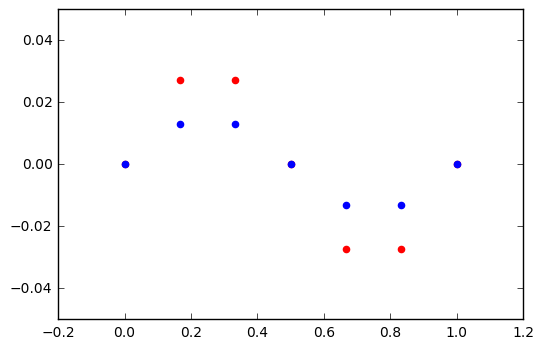

In [2]:
# Example 4.1

def f(x):
    return np.sin(2*np.pi*x)

def u_exact(x,t):
    return np.exp(-4*np.pi**2*t)*np.sin(2*np.pi*x)

n = 5
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

dt = 1./80

r = dt/dx**2

v = f(x)
v[0]=0
v[-1]=0

for i in xrange(1,8):
    v[1:-1] = r*v[0:-2] + (1-2*r)*v[1:-1] + r*v[2:]

plt.scatter(x,u_exact(x,dt*i),color='r')
plt.scatter(x,v,color='b')

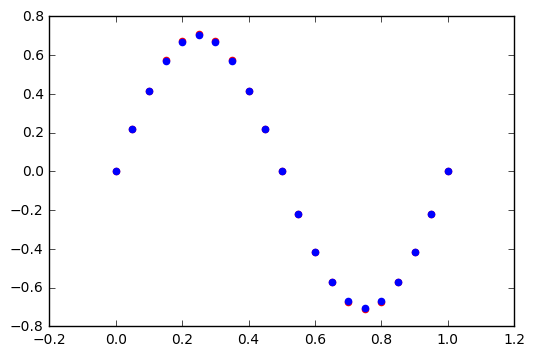

In [3]:
n = 19
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

dt = 1./800

r = dt/dx**2

v = f(x)
v[0]=0
v[-1]=0

for i in xrange(1,8):
    v[1:-1] = r*v[0:-2] + (1-2*r)*v[1:-1] + r*v[2:]

plt.scatter(x,u_exact(x,dt*i),color='r')
plt.scatter(x,v,color='b')

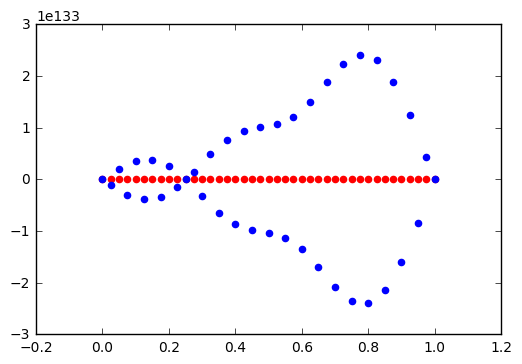

In [6]:
# Try setting n = 19, 39, 59, etc and keeping dt fixed
# Also try running more time steps

n = 39
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

dt = 1./80

r = dt/dx**2

v = f(x)
v[0]=0
v[-1]=0

for i in xrange(1,80): # Try increasing this range
    v[1:-1] = r*v[0:-2] + (1-2*r)*v[1:-1] + r*v[2:]

plt.scatter(x,u_exact(x,dt*i),color='r')
plt.scatter(x,v,color='b')

## Section 4.2: Fourier Analysis of the Numerical Solution

Here, we try to make sense of why oscillations start to appear in the numerical solution when the ratio $r=\Delta t/(\Delta x)^2$ starts to get large.

The take home message is that we require
$$
    r \leq \frac{1}{2}
$$
in order to ensure ***stability*** in the numerical solution.
Stability in the numerical solution is essentially stating that the numerical solution behaves ***qualitatively*** like the exact solution.
Since it makes no sense to ask how accurate a numerical solution is that behaves completely differently than the exact solution, we see that prior to establishing stability, it makes no sense to ask questions about accuracy.

While the analysis of Section 4.2.1 may seem quite technical in the text, it is simply following the procedure of separating variables established in Section 3.1 and then using results from Chapter 2 to obtain ***particular solutions*** of the form given in (4.13) for the fully discrete problem.
It is then established that the solution $v$ to the discrete problem is really just some linear combination of these particular solutions much like we found that solutions to the continuous heat equation could be written in terms of a linear combination of the particular solutions.
Whereas before we had to find so-called Fourier coefficients, we now must find a generalized form of these denoted by $\{\gamma_k\}$, which are computed by (4.15) (which you should compare with (4.20)).

The comparison of the discrete and continuous solutions reveal even closer similarities when we compare (4.19) to (4.21) in Section 4.2.2.
We compare errors only at the discrete space-time points where $v$ is defined, so we evaluate $u$ at these points and come to the conclusion that the approximation of $v$ to $u$ is "good" if the tail end of the sum shown in (4.23) is close to 0. 

The tail end is in fact shown to be "close to 0" for all $t_m$ in the simulation provided that we have sufficiently discretized the spatial domain. 
Furthermore, we see that $c_k=\gamma_k + O(\Delta x^2)$ if $f$ is sufficiently smooth.

Then, in order to ensure stability in Section 4.2.3, we see that $r\leq 1/2$ is required. 
I would in fact argue that the inequality should be strict, but we will not get hung up on that detail right now.
The stability is established by first acknowledging the fact that the the exact solution decays in time, so the numeircal solution should also decay in time if we want to start discussing accuracy.

We explore this ratio $r$ numerically below.

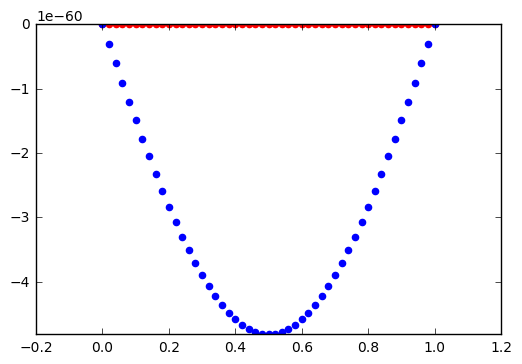

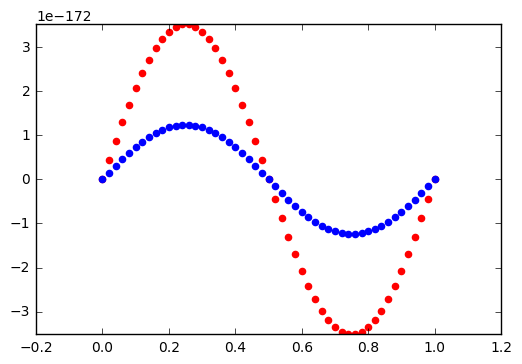

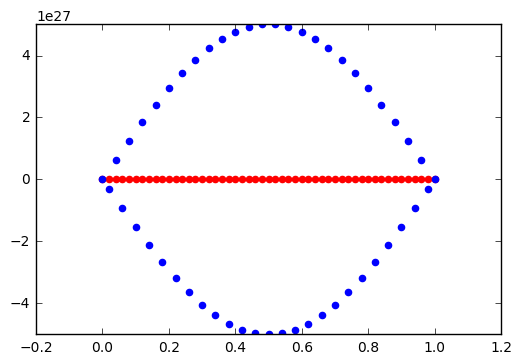

In [9]:
n = 49
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

ratios = np.array([0.49, 0.5, 0.501])

fig_count = 0
for r in ratios:
    v = f(x)
    v[0]=0
    v[-1]=0
    dt = r*dx**2
    t = 0
    while t<10: 
        v[1:-1] = r*v[0:-2] + (1-2*r)*v[1:-1] + r*v[2:]
        t += dt
        
    plt.figure(fig_count)
    plt.scatter(x,u_exact(x,t),color='r')
    plt.scatter(x,v,color='b')
    plt.ylim(np.min([u_exact(x,t).min(),v.min()]),
             np.max([u_exact(x,t).max(),v.max()]))
    
    fig_count += 1


The accuracy analysis that follows in Sections 4.2.4 and 4.2.5 is not meant to be precise.
It is intended to give you a sense of why the approximations are good for reasonable choices of $\Delta x$ and $\Delta t$.
It also sets up the ideas for Section 4.3 on Von Neumann's stability analysis.

## Section 4.3: Von Neumann's Stability Analysis

The take home message is that a numerical solution is said to be *stable in the sense of Von Neumann* if the growth of the discrete particular solutions can be bounded by the growth of the continuous particular solutions.
Much like we arrived at the stability condition of $r\leq 1/2$ by observing that the decay in the exact solution should imply decay in the numerical solution, we arrive at this same condition with Von Neumann's stability analysis.

While this analysis seems limiting since it only truly applies to linear problems, we can extend this in some cases as discussed in the text. 
It is good to be aware of this, but we will not dwell too long on this topic.



## Section 4.4: An Implicit Scheme

If we return to the method-of-lines discretization from before and instead choose to use the following finite difference scheme in time
$$
    u_t(x_j,t_{m+1}) = \frac{u(x_j,t_{m+1})-u(x_j,t_m)}{\Delta t} + O(\Delta t),
$$
and also use values of $u$ at time $t_{m+1}$ in the spatial discretization, then we end up with an implicit scheme where we are using backward Euler in time.

The scheme can be written as
$$
    \left( I + \Delta t A\right) v^{m+1} = v^m, \ m\geq 0,
$$
where $A$ is the usual matrix obtained by the spatial finite difference scheme except we retain the factor of $h^2 = 1/(\Delta x)^2$ out in front (see (4.40)).

This may seem somewhat annoying since solving for $v^{m+1}$ requires inverting the matrix $I+\Delta t A$.
However, we observe that this matrix is temporally invariant, so we can "invert once" and store the result to be used at each time step to compute $v^{m+1}$.

This method is *unconditionally stable*, which means we can choose any discretization we wish and the behavior of the numerical solution to the heat equation is qualitatively correct (if not completely garbage in terms of accuracy).

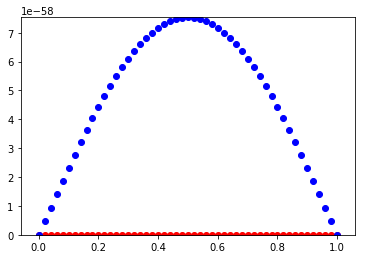

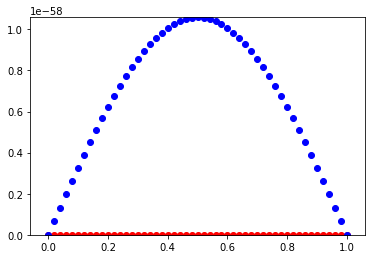

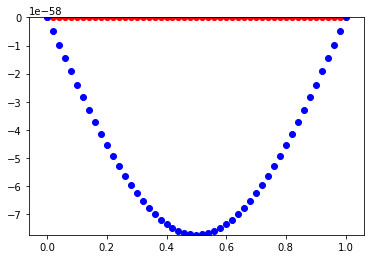

In [22]:
n = 49
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= 1/dx**2

ratios = np.array([0.49, 0.5, 0.51])

fig_count = 0
for r in ratios:
    v = f(x)
    v[0]=0
    v[-1]=0
    dt = r*dx**2
    
    B = np.eye(n)+dt*A
    B_inv = np.linalg.inv(B)
    
    t = 0
    while t<10: 
        v[1:-1] = np.dot(B_inv,v[1:-1])
        t += dt
        
    plt.figure(fig_count)
    plt.scatter(x,u_exact(x,t),color='r')
    plt.scatter(x,v,color='b')
    plt.ylim(np.min([u_exact(x,t).min(),v.min()]),
             np.max([u_exact(x,t).max(),v.max()]))
    
    fig_count += 1

## Section 4.5: Numerical Stability by Energy Arguments

Here, by assuming the stability of the explicit method given by $r\leq 1/2$, we show that numerical solutions are also stable in the original sense we considered, which is to say, with respect to perturbations in the initial data. 

Alternatively, one could obtain the requirement that $r\leq 1/2$ by requiring the discrete energy given by (4.45) to be a decerasing function in the sense of (4.46) since we know the energy in the continuous solution is a decreasing function. Subsequently, we would still arrive at the useful Corollary 4.1.

## Section 4.6: Exercises

The homework is to do Exercises 4.4, 4.6, 4.7, 4.11, 4.16, and 4.20.

As time permits, I will discuss solutions for Exercises 4.5, 4.8, 4.9, 4.10, 4.12, 4.13, 4.15, and 4.22.